In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlib
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
filepath = r"C:\Users\MOAZZAM\OneDrive\Desktop\GMU\FALL2023\AIT582\Dataset.csv"


In [5]:
# read data from csv and display top records
airbnb=pd.read_csv(filepath,sep=",")
airbnb.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/21,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/22,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/19,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/18,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/19,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/17,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/17,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/19,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/17,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
airbnb= airbnb.drop(['id','NAME','host id','lat','long','neighbourhood','service fee','host name','country','country_code','last review','house_rules','license'],axis=1)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102310 non-null  object 
 1   neighbourhood group             102570 non-null  object 
 2   instant_bookable                102494 non-null  object 
 3   cancellation_policy             102523 non-null  object 
 4   room type                       102599 non-null  object 
 5   Construction year               102385 non-null  float64
 6   price                           102352 non-null  object 
 7   minimum nights                  102190 non-null  float64
 8   number of reviews               102416 non-null  float64
 9   reviews per month               86720 non-null   float64
 10  review rate number              102273 non-null  float64
 11  calculated host listings count  102280 non-null  float64
 12  availability 365

In [8]:
airbnb.head(10)

,host_identity_verified,neighbourhood group,instant_bookable,cancellation_policy,room type,Construction year,price,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,False,strict,Private room,2020.0,$966,10.0,9.0,0.21,4.0,6.0,286.0
1,verified,Manhattan,False,moderate,Entire home/apt,2007.0,$142,30.0,45.0,0.38,4.0,2.0,228.0
2,NaN,Manhattan,True,flexible,Private room,2005.0,$620,3.0,0.0,NaN,5.0,1.0,352.0
3,unconfirmed,Brooklyn,True,moderate,Entire home/apt,2005.0,$368,30.0,270.0,4.64,4.0,1.0,322.0
4,verified,Manhattan,False,moderate,Entire home/apt,2009.0,$204,10.0,9.0,0.10,3.0,1.0,289.0
5,verified,Manhattan,True,flexible,Entire home/apt,2013.0,$577,3.0,74.0,0.59,3.0,1.0,374.0
6,NaN,Brooklyn,False,moderate,Private room,2015.0,$71,45.0,49.0,0.40,5.0,1.0,224.0
7,unconfirmed,Brooklyn,False,moderate,Private room,2009.0,"$1,060",45.0,49.0,0.40,5.0,1.0,219.0
8,verified,Manhattan,True,strict,Private room,2005.0,"$1,018",2.0,430.0,3.47,3.0,1.0,180.0
9,unconfirmed,Manhattan,False,strict,Private room,2015.0,$291,2.0,118.0,0.99,5.0,1.0,375.0


In [9]:
airbnb.isna().sum()
airbnb=airbnb.dropna()

In [10]:
airbnb.columns = airbnb.columns.str.replace(' ', '_')
airbnb['price'] = airbnb['price']. str. replace('$', '')
airbnb['price'] = airbnb['price'].str.replace(',', '')
airbnb['price'] = airbnb['price'].astype('float')

In [11]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'Queens', 'Bronx',
       'Staten Island'], dtype=object)

In [12]:
airbnb['neighbourhood_group'].value_counts()

Brooklyn         35286
Manhattan        35257
Queens           11332
Bronx             2316
Staten Island      837
brookln              1
Name: neighbourhood_group, dtype: int64

In [13]:
airbnb['neighbourhood_group'].replace('brookln', 'Brooklyn', inplace=True)

In [14]:
airbnb['host_identity_verified'].unique()

array(['unconfirmed', 'verified'], dtype=object)

In [15]:
airbnb['host_identity_verified'].replace('unconfirmed', 'unverified', inplace=True)

In [16]:
airbnb['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [17]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [18]:
airbnb['Construction_year']=pd.to_numeric(airbnb['Construction_year'], errors='coerce').astype('Int64')
airbnb['minimum_nights']=pd.to_numeric(airbnb['minimum_nights'], errors='coerce').astype('Int64')
airbnb['number_of_reviews']=pd.to_numeric(airbnb['number_of_reviews'], errors='coerce').astype('Int64')
airbnb['review_rate_number']=pd.to_numeric(airbnb['review_rate_number'], errors='coerce').astype('Int64')
airbnb['calculated_host_listings_count']=pd.to_numeric(airbnb['calculated_host_listings_count'], errors='coerce').astype('Int64')
airbnb['availability_365']=pd.to_numeric(airbnb['availability_365'], errors='coerce').astype('Int64')

In [19]:
airbnb['reviews_per_month']=airbnb['reviews_per_month'].fillna(0).astype(np.int64, errors='ignore')

In [20]:
airbnb.head()

,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room_type,Construction_year,price,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,unverified,Brooklyn,False,strict,Private room,2020,966.0,10,9,0,4,6,286
1,verified,Manhattan,False,moderate,Entire home/apt,2007,142.0,30,45,0,4,2,228
3,unverified,Brooklyn,True,moderate,Entire home/apt,2005,368.0,30,270,4,4,1,322
4,verified,Manhattan,False,moderate,Entire home/apt,2009,204.0,10,9,0,3,1,289
5,verified,Manhattan,True,flexible,Entire home/apt,2013,577.0,3,74,0,3,1,374


In [21]:
airbnb['availability_365'] = airbnb['availability_365'].apply(lambda x: abs(x) if x < 0 else x)
airbnb = airbnb[airbnb['availability_365'] <= 365]
airbnb['revenue']=(airbnb['availability_365']*airbnb['price'])

In [22]:
count_negative = (airbnb['minimum_nights'] < 0).sum()
airbnb['minimum_nights'] = airbnb['minimum_nights'].abs()

In [23]:
numeric_summary_statistics = airbnb.describe(include=[np.number])
numeric_summary_statistics

,Construction_year,price,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,revenue
count,82841.000000,82841.000000,82841.000000,82841.000000,82841.000000,82841.000000,82841.000000,82841.000000,82841.000000
mean,2012.490132,626.505185,7.478338,31.913352,1.009729,3.288239,7.105600,135.067044,84681.640951
std,5.761752,331.701990,28.188685,51.469730,1.704526,1.277387,29.714835,128.436049,101809.373973
min,2003.000000,50.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2008.000000,341.000000,2.000000,3.000000,0.000000,2.000000,1.000000,5.000000,2254.000000
50%,2012.000000,626.000000,3.000000,11.000000,0.000000,3.000000,1.000000,92.000000,42525.000000
75%,2017.000000,914.000000,5.000000,38.000000,2.000000,4.000000,2.000000,253.000000,134144.000000
max,2022.000000,1200.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,365.000000,438000.000000


In [24]:
categorical_summary_statistics = airbnb.select_dtypes(include=['object']).describe()
categorical_summary_statistics

,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room_type
count,82841,82841,82841,82841,82841
unique,2,5,2,3,4
top,unverified,Brooklyn,False,moderate,Entire home/apt
freq,41421,34355,41653,27744,43721


In [25]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82841 entries, 0 to 102593
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          82841 non-null  object 
 1   neighbourhood_group             82841 non-null  object 
 2   instant_bookable                82841 non-null  object 
 3   cancellation_policy             82841 non-null  object 
 4   room_type                       82841 non-null  object 
 5   Construction_year               82841 non-null  Int64  
 6   price                           82841 non-null  float64
 7   minimum_nights                  82841 non-null  Int64  
 8   number_of_reviews               82841 non-null  Int64  
 9   reviews_per_month               82841 non-null  int64  
 10  review_rate_number              82841 non-null  Int64  
 11  calculated_host_listings_count  82841 non-null  Int64  
 12  availability_365               

In [26]:
airbnb_filtered=airbnb

In [27]:
# Iterate through each column in the DataFrame
for column in airbnb_filtered.columns:
    if airbnb_filtered[column].dtype == 'object' or airbnb_filtered[column].dtype.name == 'category':
        # finding unique values in each categorical column
        unique_values = airbnb_filtered[column].unique()
        # Create a mapping dictionary automatically
        mapping = {value: index for index, value in enumerate(unique_values)}
        # Map the 'neighbourhood_group' column using the custom mapping
        airbnb_filtered[column] = airbnb_filtered[column].map(mapping)

In [28]:
airbnb_filtered.head()

,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room_type,Construction_year,price,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,revenue
0,0,0,0,0,0,2020,966.0,10,9,0,4,6,286,276276.0
1,1,1,0,1,1,2007,142.0,30,45,0,4,2,228,32376.0
3,0,0,1,1,1,2005,368.0,30,270,4,4,1,322,118496.0
4,1,1,0,1,1,2009,204.0,10,9,0,3,1,289,58956.0
7,0,0,0,1,0,2009,1060.0,45,49,0,5,1,219,232140.0


0.0036272842850381126


<BarContainer object of 12 artists>

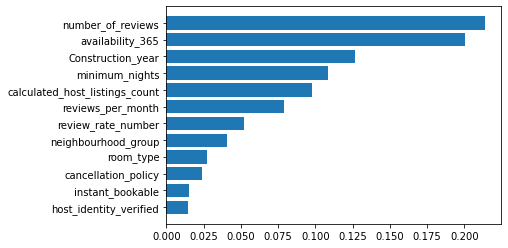

In [29]:
y = airbnb_filtered.price
x =  airbnb_filtered.drop(['price','revenue'], axis = 1)  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)
Rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)
Rf_model.fit(x_train,y_train)
y_predict=Rf_model.predict(x_test)

# Calculate the accuracy 
print(r2_score(y_test,y_predict))
sorted_idx=Rf_model.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], Rf_model.feature_importances_[sorted_idx])


In [30]:
# Linear Regression
selected=airbnb_filtered.drop(['price','revenue','host_identity_verified','review_rate_number','instant_bookable',
                              'cancellation_policy','room_type'], axis = 1)
x_train_selected, x_test_selected, y_train, y_test = train_test_split(selected,y,test_size = 0.25, random_state = 42)

linear_model = LinearRegression()
linear_model.fit(x_train_selected, y_train)
y_predict_linear = linear_model.predict(x_test_selected)

# Calculate R^2 score and mean absolute error 
r2_linear = r2_score(y_test, y_predict_linear)
mae_linear = mean_absolute_error(y_test, y_predict_linear)
print(f"R^2 score for Linear Regression : {r2_linear}")
print(f"Mean Absolute Error for Linear Regression : {mae_linear}")

reg = linear_model  
coefs = pd.DataFrame(reg.coef_, selected.columns, columns=['Coefficient'])
print(coefs)

y_pred = reg.predict(x_test_selected)
airbnb_linear = pd.DataFrame({"Y_test": y_test, "Y_pred": y_pred})
print(airbnb_linear.head(10))


R^2 score for Linear Regression : -2.246558204332949e-05
Mean Absolute Error for Linear Regression : 288.1124924853822
                                Coefficient
neighbourhood_group                0.460515
Construction_year                 -0.259068
minimum_nights                    -0.079075
number_of_reviews                  0.012425
reviews_per_month                  0.082055
calculated_host_listings_count     0.016043
availability_365                   0.000654
       Y_test      Y_pred
11754   998.0  623.587471
60120   576.0  622.494222
14778  1007.0  625.628429
99051   339.0  626.845486
55036   903.0  629.573568
42997   112.0  629.193549
35791   349.0  625.123119
50592    50.0  622.806132
41465   356.0  631.004638
50677   791.0  625.989214


In [31]:
from sklearn.preprocessing import StandardScaler



In [32]:
selected_features = ['neighbourhood_group', 'Construction_year', 'minimum_nights',
                      'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count', 'availability_365']

In [33]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(airbnb[selected_features])

In [34]:
# Separate features and target variable
X = pd.DataFrame(scaled_features, columns=selected_features)
y = airbnb['price']

In [35]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection using SelectKBest
selector = SelectKBest(f_regression, k=6)
selected_features = selector.fit(X, y).get_support()
selected_features_list = selected_features.tolist()

# Subset X using the actual number of selected features
X = X.iloc[:, selected_features_list]


In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate model performance
r2_score_linear = r2_score(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
mape_linear = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared score:", r2_score_linear)
print("Mean Absolute Error:", mae_linear)
print("Root Mean Squared Error:", rmse_linear)
print("Mean Absolute Percentage Error:", mape_linear)

R-squared score: -1.3050240565526394e-05
Mean Absolute Error: 288.1125281493832
Root Mean Squared Error: 332.7335853744083
Mean Absolute Percentage Error: 101.64219861033305


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [39]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [40]:
y_pred = gb_model.predict(X_test)


In [41]:
r2_score_gb = r2_score(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
mape_gb = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared score:", r2_score_gb)
print("Mean Absolute Error:", mae_gb)
print("Root Mean Squared Error:", rmse_gb)
print("Mean Absolute Percentage Error:", mape_gb)


R-squared score: 0.0014630444715314495
Mean Absolute Error: 287.74364625638776
Root Mean Squared Error: 332.487924749319
Mean Absolute Percentage Error: 101.5750897875917


In [42]:
pip install scikit-learn --upgrade


Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define a reduced parameter grid with fewer hyperparameters
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.05],
    'max_depth': [5],
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='r2', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best parameters:')
print(grid_search.best_params_)


Best parameters:
{'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [45]:
# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2_score_gb = r2_score(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
mape_gb = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print('Evaluation metrics:')
print('R-squared score:', r2_score_gb)
print('Mean Absolute Error:', mae_gb)
print('Root Mean Squared Error:', rmse_gb)
print('Mean Absolute Percentage Error:', mape_gb)

Evaluation metrics:
R-squared score: 0.004056206511657501
Mean Absolute Error: 287.42077335789713
Root Mean Squared Error: 332.05591491715
Mean Absolute Percentage Error: 101.40933772571601


In [47]:
param_grid = {
    'n_estimators': [75, 125],
    'learning_rate': [0.025, 0.075],
    'max_depth': [4, 6],
    'min_samples_split': [3, 7],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='r2', cv=3)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best parameters:')
print(grid_search.best_params_)

Best parameters:
{'learning_rate': 0.075, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 125}


In [48]:
# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2_score_gb = r2_score(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
mape_gb = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print('Evaluation metrics:')
print('R-squared score:', r2_score_gb)
print('Mean Absolute Error:', mae_gb)
print('Root Mean Squared Error:', rmse_gb)
print('Mean Absolute Percentage Error:', mape_gb)

Evaluation metrics:
R-squared score: 0.012213845759609376
Mean Absolute Error: 285.8843609616842
Root Mean Squared Error: 330.6932064730159
Mean Absolute Percentage Error: 100.83828793787293
